In [126]:
import pandas as pd
from pathlib import Path
# Why haven't we invented anything better than matplotlib...
import matplotlib.pyplot as plt

In [127]:
OPENDSS_PATH = Path("./opendss/output/processed_output")
PP_PATH = Path("pandapower/simulation_res")

In [128]:
# Buses 0 and 1 are the HV and LV sides of the transformer respectively, there is no comparable bus / line in the OpenDSS model so drop them
pp_df_vm_a = pd.read_csv(f"{PP_PATH.resolve()}/vm_a_pu.csv").drop(["Unnamed: 0", "0", "1"], axis=1)
pp_df_vm_b = pd.read_csv(f"{PP_PATH.resolve()}/vm_b_pu.csv").drop(["Unnamed: 0", "0", "1"], axis=1)
pp_df_vm_c = pd.read_csv(f"{PP_PATH.resolve()}/vm_c_pu.csv").drop(["Unnamed: 0", "0", "1"], axis=1)

In [129]:
# The column numbers don't quite line up with OpenDSS due to the aforementioned HV / LV transformer buses, so need to decrement bus number by 1
def decrement_col_numbers(df):
    cols = [int(col) for col in df.columns]
    cols.sort()
    for col in cols:
        df[str(col - 1)] = df[str(col)]
    df = df.drop([str(cols[-1])], axis=1)
    return df

pp_df_vm_a = decrement_col_numbers(pp_df_vm_a)
pp_df_vm_b = decrement_col_numbers(pp_df_vm_b)
pp_df_vm_c = decrement_col_numbers(pp_df_vm_c)



In [130]:
odss_df_vm_a = pd.read_csv(f"{OPENDSS_PATH}/vm_a_pu.csv").drop(["Unnamed: 0"], axis=1)
odss_df_vm_b = pd.read_csv(f"{OPENDSS_PATH}/vm_b_pu.csv").drop(["Unnamed: 0"], axis=1)
odss_df_vm_c = pd.read_csv(f"{OPENDSS_PATH}/vm_c_pu.csv").drop(["Unnamed: 0"], axis=1)


In [131]:
vm_a_delta_df = pd.DataFrame()
vm_b_delta_df = pd.DataFrame()
vm_c_delta_df = pd.DataFrame()

In [132]:
def compute_vm_delta(df_a, df_b, result_df):
    for col in df_a.columns:
        # More warnings ahoy, again no time to care
        result_df[col] = df_a[col] - df_b[col]

In [133]:
compute_vm_delta(pp_df_vm_a, odss_df_vm_a, vm_a_delta_df)
compute_vm_delta(pp_df_vm_b, odss_df_vm_b, vm_b_delta_df)
compute_vm_delta(pp_df_vm_c, odss_df_vm_c, vm_c_delta_df)

/var/folders/lp/1260tw150dq3w83bb5lkjmpw0000gn/T/ipykernel_31665/2386849204.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df[col] = df_a[col] - df_b[col]
/var/folders/lp/1260tw150dq3w83bb5lkjmpw0000gn/T/ipykernel_31665/2386849204.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df[col] = df_a[col] - df_b[col]
/var/folders/lp/1260tw150dq3w83bb5lkjmpw0000gn/T/ipykernel_31665/2386849204.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, 

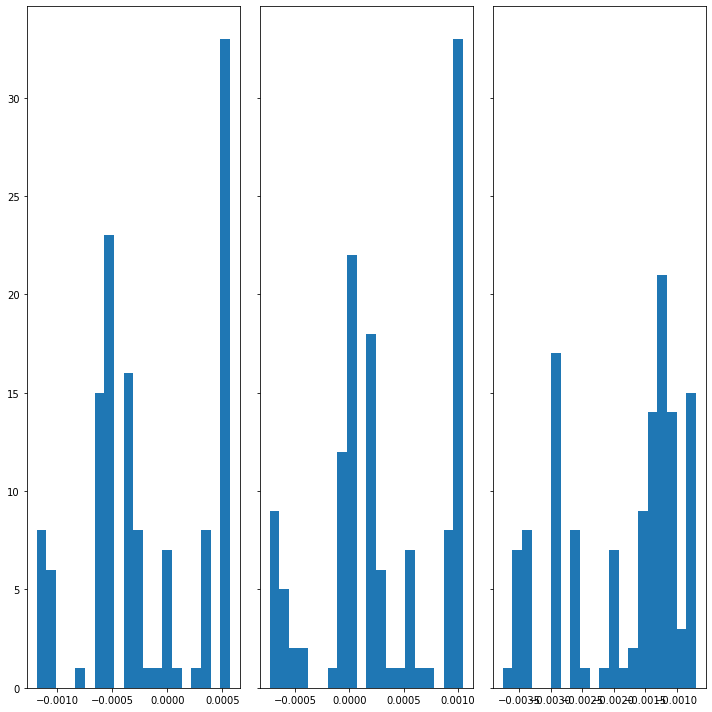

In [134]:
# Lets look at the mean delta between OpenDSS and Pandapower
n_bins = 20
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True, figsize=(10,10))
_ = axs[0].hist(vm_a_delta_df.mean(), bins=n_bins)
_ = axs[1].hist(vm_b_delta_df.mean(), bins=n_bins)
_ = axs[2].hist(vm_c_delta_df.mean(), bins=n_bins)

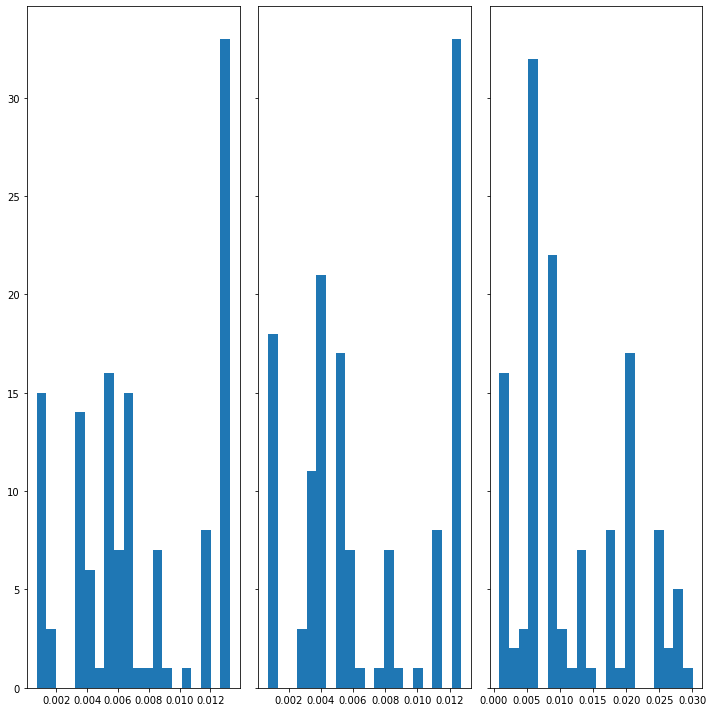

In [135]:
# Lets look at the max absolute deviation between OpenDSS and Pandapower
n_bins = 20
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True, figsize=(10,10))
_ = axs[0].hist(vm_a_delta_df.abs().max(), bins=n_bins)
_ = axs[1].hist(vm_b_delta_df.abs().max(), bins=n_bins)
_ = axs[2].hist(vm_c_delta_df.abs().max(), bins=n_bins)